# –î–æ–º–∞—à–Ω–µ–µ –∑–∞–¥–∞–Ω–∏–µ. –†–µ—à–µ–Ω–∏–µ –∫–æ–Ω–∫—É—Ä—Å–∞ –Ω–∞ kaggle.com

1. –ú–∞—É–Ω—Ç–∏–º –≥—É–≥–ª –¥—Ä–∞–π–≤
2. –£—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞–µ–º –∫–∞—Ç–±—É—Å—Ç
3. –ò–º–ø–æ—Ä—Ç –±–∏–±–ª–∏–æ—Ç–µ–∫

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install catboost

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier

# –ü–µ—Ä–≤–∞—è —á–∞—Å—Ç—å. –ò—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏–µ

## –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö (2 –±–∞–ª–ª–∞)

1) –ü–æ—Å–º–æ—Ç—Ä–∏—Ç–µ –Ω–∞ —Å–ª—É—á–∞–π–Ω—ã–µ —Å—Ç—Ä–æ—á–∫–∏.

2) –ü–æ—Å–º–æ—Ç—Ä–∏—Ç–µ, –µ—Å—Ç—å –ª–∏ –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ –Ω–µ–∑–∞–ø–æ–ª–Ω–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è (nan'—ã) —Å –ø–æ–º–æ—â—å—é data.isna() –∏–ª–∏ data.info() –∏, –µ—Å–ª–∏ –Ω—É–∂–Ω–æ, –∑–∞–º–µ–Ω–∏—Ç–µ –∏—Ö –Ω–∞ —á—Ç–æ-—Ç–æ. –ë—É–¥–µ—Ç —Ö–æ—Ä–æ—à–æ, –µ—Å–ª–∏ –≤—ã –ø–æ—Å—Ç—Ä–æ–∏—Ç–µ —Ç–∞–±–ª–∏—á–∫—É —Å –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º nan –≤ –∫–∞–∂–¥–æ–π –∫–æ–ª–æ–Ω–∫–µ.

In [ ]:
!gdown 1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K  # train.csv
!gdown 1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r  # test.csv
!gdown 199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y  # submission.csv

Downloading...
From: https://drive.google.com/uc?id=1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K
To: /content/train.csv
100% 664k/664k [00:00<00:00, 55.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r
To: /content/test.csv
100% 218k/218k [00:00<00:00, 71.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y
To: /content/submission.csv
100% 14.7k/14.7k [00:00<00:00, 27.5MB/s]


In [ ]:
# –ß–∏—Ç–∞–µ–º –¥–∞–Ω–Ω—ã–µ
data_train = pd.read_csv('/content/drive/MyDrive/HW 3 Kaggle/train.csv')
data_test = pd.read_csv('/content/drive/MyDrive/HW 3 Kaggle/test.csv')

In [ ]:
# –ß–∏—Å–ª–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# –ö–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [ ]:
data_train.head()

ClientPeriod  MonthlySpending TotalSpent     Sex  IsSeniorCitizen  \
0            55            19.50    1026.35    Male                0   
1            72            25.85     1872.2    Male                0   
2             1            75.90       75.9    Male                0   
3            32            79.30       2570  Female                1   
4            60           115.25    6758.45  Female                0   

  HasPartner HasChild HasPhoneService HasMultiplePhoneNumbers  \
0        Yes      Yes             Yes                      No   
1        Yes       No             Yes                     Yes   
2         No       No             Yes                      No   
3        Yes       No             Yes                     Yes   
4        Yes      Yes             Yes                     Yes   

  HasInternetService HasOnlineSecurityService      HasOnlineBackup  \
0                 No      No internet service  No internet service   
1                 No      No internet service  No internet service   
2        Fiber optic                       No                   No   
3        Fiber optic                       No                   No   
4        Fiber optic                      Yes                  Yes   

   HasDeviceProtection HasTechSupportAccess          HasOnlineTV  \
0  No internet service  No internet service  No internet service   
1  No internet service  No internet service  No internet service   
2                   No                  Yes                   No   
3                  Yes                   No                   No   
4                  Yes                  Yes                  Yes   

  HasMovieSubscription HasContractPhone IsBillingPaperless  \
0  No internet service         One year                 No   
1  No internet service         Two year                 No   
2                   No   Month-to-month                Yes   
3                   No   Month-to-month                 No   
4                  Yes         Two year                 No   

             PaymentMethod  Churn  
0             Mailed check      0  
1  Credit card (automatic)      0  
2         Electronic check      1  
3             Mailed check      0  
4  Credit card (automatic)      0

In [ ]:
# –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –¥–∞–Ω–Ω—ã–µ –≤ –∏–Ω—Ç–µ—Ä–∞–∫—Ç–∏–≤–µ
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=data_train)

https://docs.google.com/spreadsheets/d/1erPZNfoSSeKlApY8HDypj-Zx5YoivaVC2q1glqewDzI#gid=0


/usr/local/lib/python3.10/dist-packages/google/colab/sheets.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return frame.applymap(_clean_val).replace({np.nan: None})


In [ ]:
# –≤–∏–¥–∏–º, —á—Ç–æ –±–æ–ª—å—à–∞—è —á–∞—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –Ω–µ —á–∏—Å–ª–æ–≤–æ–≥–æ —Ç–∏–ø–∞
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [ ]:
data_train.Sex.value_counts()

Sex
Male      2655
Female    2627
Name: count, dtype: int64

In [ ]:
# —Ñ–∏—á–∞ TotalSpent –æ–±—ä–µ–∫—Ç–Ω–∞—è, —Ö–æ—Ç—è –∏–º–µ–µ—Ç —á–∏—Å–ª–æ–≤–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ --> –ø–µ—Ä–µ–≤–µ–¥–µ–º –≤ —á–∏—Å–ª–æ–≤—É—é
data_train['TotalSpent'] = pd.to_numeric(data_train['TotalSpent'], errors='coerce')
data_test['TotalSpent'] = pd.to_numeric(data_train['TotalSpent'], errors='coerce')

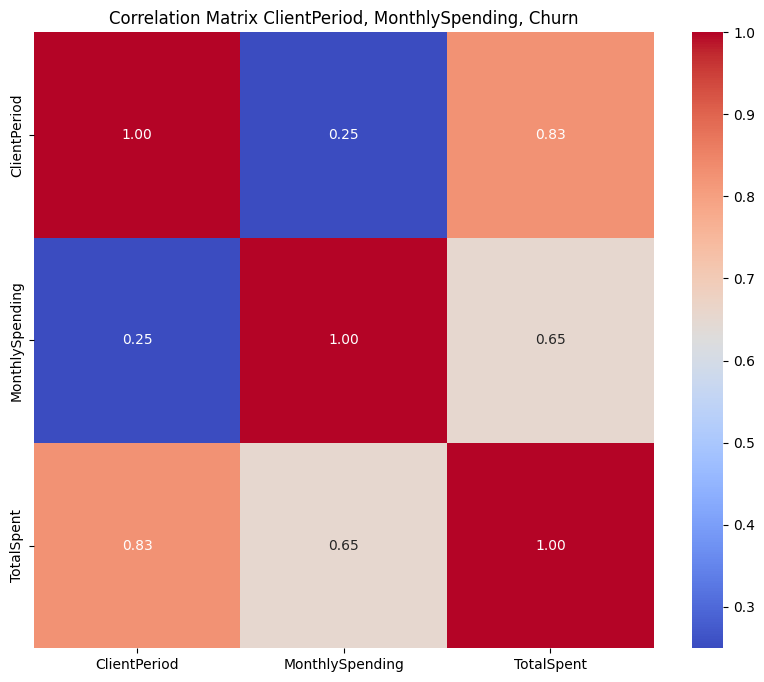

In [ ]:
# –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —á–∏—Å–ª–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
plt.figure(figsize=(10, 8))
sns.heatmap(data_train[num_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix ClientPeriod, MonthlySpending, Churn')
plt.show()

‚ùó –í—ã—Å–æ–∫–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è –º–µ–∂–¥—É MonthlySpending –∏ TotalSpent 0.65 (–ª–æ–≥–∏—á–Ω–æ), –Ω–æ —ç—Ç–æ –º–æ–∂–µ—Ç –±—ã—Ç—å –ø—Ä–æ–±–ª–µ–º–æ–π. –¢–∞–∫–∂–µ –≤—ã—Å–æ–∫–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è –º–µ–∂–¥—É ClientPeriod –∏ TotalSpent 0.83

In [ ]:
data_train[num_cols].describe()

ClientPeriod  MonthlySpending   TotalSpent
count   5282.000000      5282.000000  5273.000000
mean      32.397009        64.924754  2291.390461
std       24.550326        30.176464  2269.014233
min        0.000000        18.250000    18.800000
25%        9.000000        35.462500   401.100000
50%       29.000000        70.400000  1410.250000
75%       55.000000        90.050000  3807.350000
max       72.000000       118.750000  8684.800000

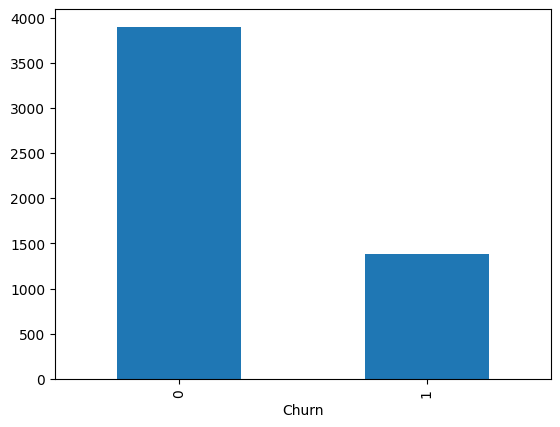

In [ ]:
# –ø–æ—Å–º–æ—Ç—Ä–∏–º, —á—Ç–æ –ø—Ä–æ–∏—Å—Ö–æ–¥–∏—Ç –≤ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π
target_feature = data_train.Churn.value_counts()
bar_chart = target_feature.plot(kind='bar')

# –≤–∏–¥–∏–º, —á—Ç–æ —Ü–µ–ª–µ–≤–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è —Ä–∞–∑–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–∞ --> —Ö–æ—á—É –ø—Ä–∏–º–µ–Ω–∏—Ç—å SMOTE –ø–æ–∑–∂–µ.

In [ ]:
data_train[num_cols].isna().sum()
# –≤ TotalSpent 9 NaN –∑–Ω–∞—á–µ–Ω–∏–π - –Ω–µ —Ç–∞–∫ –º–Ω–æ–≥–æ, –¥—É–º–∞—é –º–æ–∂–Ω–æ –∑–∞–±–∏—Ç—å, –Ω–∏—á–µ–≥–æ –Ω–µ –ø–æ—Ç–µ—Ä—è–≤ - –∑–∞–º–µ–Ω—é –Ω–∞ –º–æ–¥—É

ClientPeriod       0
MonthlySpending    0
TotalSpent         9
dtype: int64

In [ ]:
# –∑–∞–º–µ–Ω–∏–ª–∏ –ù–∞–ù –∑–Ω–∞—á–µ–Ω–∏—è –Ω–∞ –º–æ–¥—É, –º–µ–¥–∏–∞–Ω–∞ —Å–ª–∏—à–∫–æ–º –≤—ã—Å–æ–∫–∞—è
data_train['TotalSpent'] = data_train['TotalSpent'].fillna(data_train['TotalSpent'].mode()[0])
data_test['TotalSpent'] = data_test['TotalSpent'].fillna(data_test['TotalSpent'].mode()[0])

{'whiskers': [<matplotlib.lines.Line2D at 0x7e716b3a5780>,
 'caps': [<matplotlib.lines.Line2D at 0x7e716b3a5cc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e716b3a54e0>,
 'medians': [<matplotlib.lines.Line2D at 0x7e716b3a6200>,
 'fliers': [<matplotlib.lines.Line2D at 0x7e716b3a6470>,
 'means': []}

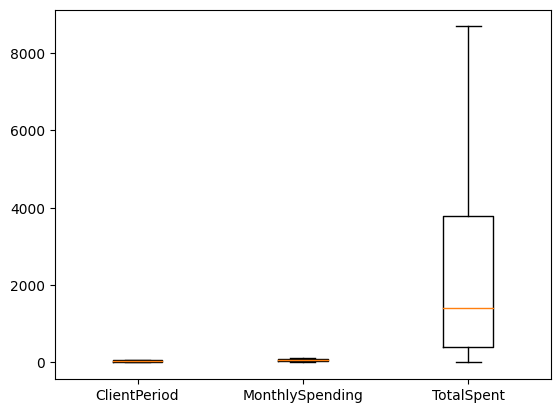

In [ ]:
# –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ boxplot —á–∏—Å–ª–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
plt.boxplot(data_train[num_cols], labels=data_train[num_cols].columns)

In [ ]:
data_train.TotalSpent.describe()

count    5282.000000
mean     2287.520579
std      2269.014643
min        18.800000
25%       395.725000
50%      1405.650000
75%      3795.212500
max      8684.800000
Name: TotalSpent, dtype: float64

In [ ]:
data_train.query('TotalSpent > 3795.212500')
# 1321 —Å–µ–º–ø–ª –∏–º–µ–µ—Ç TotalSpent –≤—ã—à–µ 3-–≥–æ –∫–≤–∞–Ω—Ç–∏–ª—è, —á—Ç–æ-—Ç–æ —É–±–µ—Ä –¥–æ—Ñ–∏–≥–∞ –≤—ã–±—Ä–æ—Å–æ–≤,
# –µ—Å–ª–∏ –±—ã –º—ã –∑–Ω–∞–ª–∏, —á—Ç–æ —Å —ç—Ç–∏–º –¥–µ–ª–∞—Ç—å, –ù–û –∏–≥–Ω–æ—Ä–∏—Ç—å 1/3 –≤—ã–±—Ä–æ—Å–æ–≤ —Ç–æ—á–Ω–æ –Ω–µ–ª—å–∑—è

ClientPeriod  MonthlySpending  TotalSpent     Sex  IsSeniorCitizen  \
4               60           115.25     6758.45  Female                0   
8               50           105.95     5341.80    Male                0   
9               72            61.20     4390.25    Male                0   
11              70           113.05     7869.05  Female                0   
12              69            99.50     6841.45    Male                0   
...            ...              ...         ...     ...              ...   
5267            72           112.25     8041.65    Male                0   
5268            72           117.50     8670.10  Female                0   
5271            67            88.80     5903.15    Male                0   
5273            60           104.35     6339.45    Male                1   
5276            72            98.20     7015.90  Female                0   

     HasPartner HasChild HasPhoneService HasMultiplePhoneNumbers  \
4           Yes      Yes             Yes                     Yes   
8           Yes      Yes             Yes                     Yes   
9            No       No              No        No phone service   
11          Yes      Yes             Yes                     Yes   
12          Yes       No             Yes                     Yes   
...         ...      ...             ...                     ...   
5267        Yes      Yes             Yes                     Yes   
5268        Yes      Yes             Yes                     Yes   
5271         No       No             Yes                     Yes   
5273        Yes       No             Yes                     Yes   
5276        Yes       No             Yes                     Yes   

     HasInternetService HasOnlineSecurityService HasOnlineBackup  \
4           Fiber optic                      Yes             Yes   
8           Fiber optic                      Yes              No   
9                   DSL                      Yes              No   
11          Fiber optic                      Yes             Yes   
12          Fiber optic                       No              No   
...                 ...                      ...             ...   
5267        Fiber optic                       No             Yes   
5268        Fiber optic                      Yes             Yes   
5271                DSL                      Yes             Yes   
5273        Fiber optic                       No             Yes   
5276        Fiber optic                      Yes              No   

     HasDeviceProtection HasTechSupportAccess HasOnlineTV  \
4                    Yes                  Yes         Yes   
8                    Yes                   No         Yes   
9                    Yes                  Yes         Yes   
11                   Yes                  Yes         Yes   
12                   Yes                   No         Yes   
...                  ...                  ...         ...   
5267                 Yes                  Yes         Yes   
5268                 Yes                  Yes         Yes   
5271                 Yes                  Yes         Yes   
5273                 Yes                   No         Yes   
5276                 Yes                  Yes         Yes   

     HasMovieSubscription HasContractPhone IsBillingPaperless  \
4                     Yes         Two year                 No   
8                     Yes   Month-to-month                 No   
9                     Yes         Two year                Yes   
11                    Yes         Two year                Yes   
12                    Yes         One year                 No   
...                   ...              ...                ...   
5267                  Yes         Two year                Yes   
5268                  Yes         Two year                 No   
5271                  Yes         One year                Yes   
5273                  Yes         One year                Yes   
5276       

In [ ]:
# –ø–æ—Ä–æ–≥ 99-–≥–æ –∫–≤–∞–Ω—Ç–∏–ª—è
percentile_99 = data_train[num_cols].quantile(0.99)

# —Ç—Ä–∏–º–º–∏—Ä–æ–≤–∞–Ω–∏–µ: –∑–∞–º–µ–Ω–∏–º –∑–Ω–∞—á–µ–Ω–∏—è –≤—ã—à–µ 99-–≥–æ –ø–µ—Ä—Å–µ–Ω—Ç–∏–ª—è –Ω–∞ —Å–∞–º–∏ –ø–æ—Ä–æ–≥–æ–≤—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è

for col in num_cols:
    data_train[col] = np.where(data_train[col] > percentile_99[col], percentile_99[col], data_train[col])

data_train[num_cols].describe()
# —Ç–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º –º—ã –Ω–µ–º–Ω–æ–≥–æ —Å–Ω–∏–∑–∏–ª–∏ –∑–Ω–∞—á–∏–º–æ—Å—Ç—å –≤—ã–±—Ä–æ—Å–æ–≤ –≤ –≤—ã–±–æ—Ä–∫–µ, –Ω–µ —Å–∏–ª—å–Ω–æ –ø–æ—Ç–µ—Ä—è–≤ –≤ –¥–∞–Ω–Ω—ã—Ö, —Ç.–∫ –≤–∑—è–ª–∏ 99-–π –∫–≤–∞–Ω—Ç–∏–ª—å

ClientPeriod  MonthlySpending   TotalSpent
count   5282.000000      5282.000000  5282.000000
mean      32.397009        64.911549  2284.674515
std       24.550326        30.154050  2261.557761
min        0.000000        18.250000    18.800000
25%        9.000000        35.462500   395.725000
50%       29.000000        70.400000  1405.650000
75%       55.000000        90.050000  3795.212500
max       72.000000       115.050000  8017.787500

{'whiskers': [<matplotlib.lines.Line2D at 0x7e716b13b1f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7e716b13b730>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e716b13af50>,
 'medians': [<matplotlib.lines.Line2D at 0x7e716b13bc70>,
 'fliers': [<matplotlib.lines.Line2D at 0x7e716b13bf10>,
 'means': []}

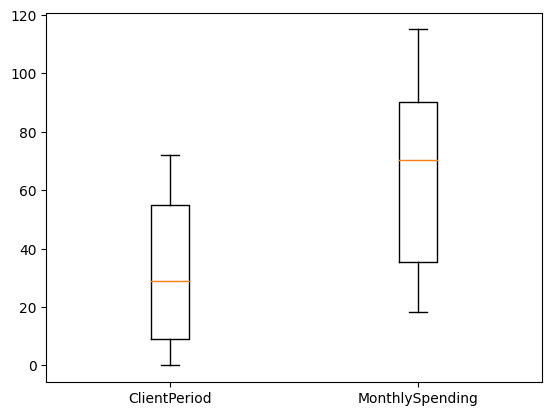

In [ ]:
plt.boxplot([data_train['ClientPeriod'], data_train['MonthlySpending']], labels=['ClientPeriod', 'MonthlySpending'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7e716b1c33d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7e716b1c3910>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e716b1c3130>,
 'medians': [<matplotlib.lines.Line2D at 0x7e716b1c3e50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7e716b1f8130>,
 'means': []}

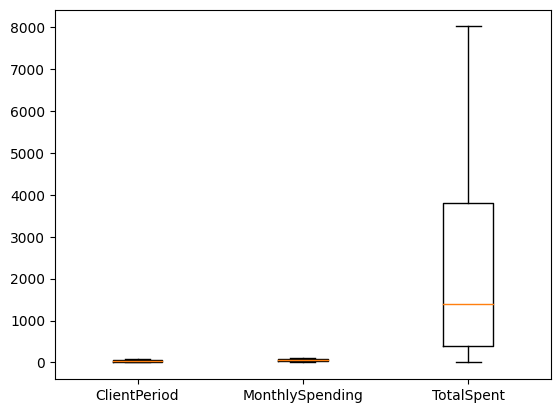

In [ ]:
plt.boxplot(data_train[num_cols], labels=data_train[num_cols].columns)
# –º–∞–∫—Å –≤—ã–±—Ä–æ—Å –Ω–µ–º–Ω–æ–≥–æ —Å–Ω–∏–∑–∏–ª—Å—è - –Ω–∞ 500 —Å–µ—Ä–µ–±—Ä—è–Ω–Ω–∏–∫–æ–≤

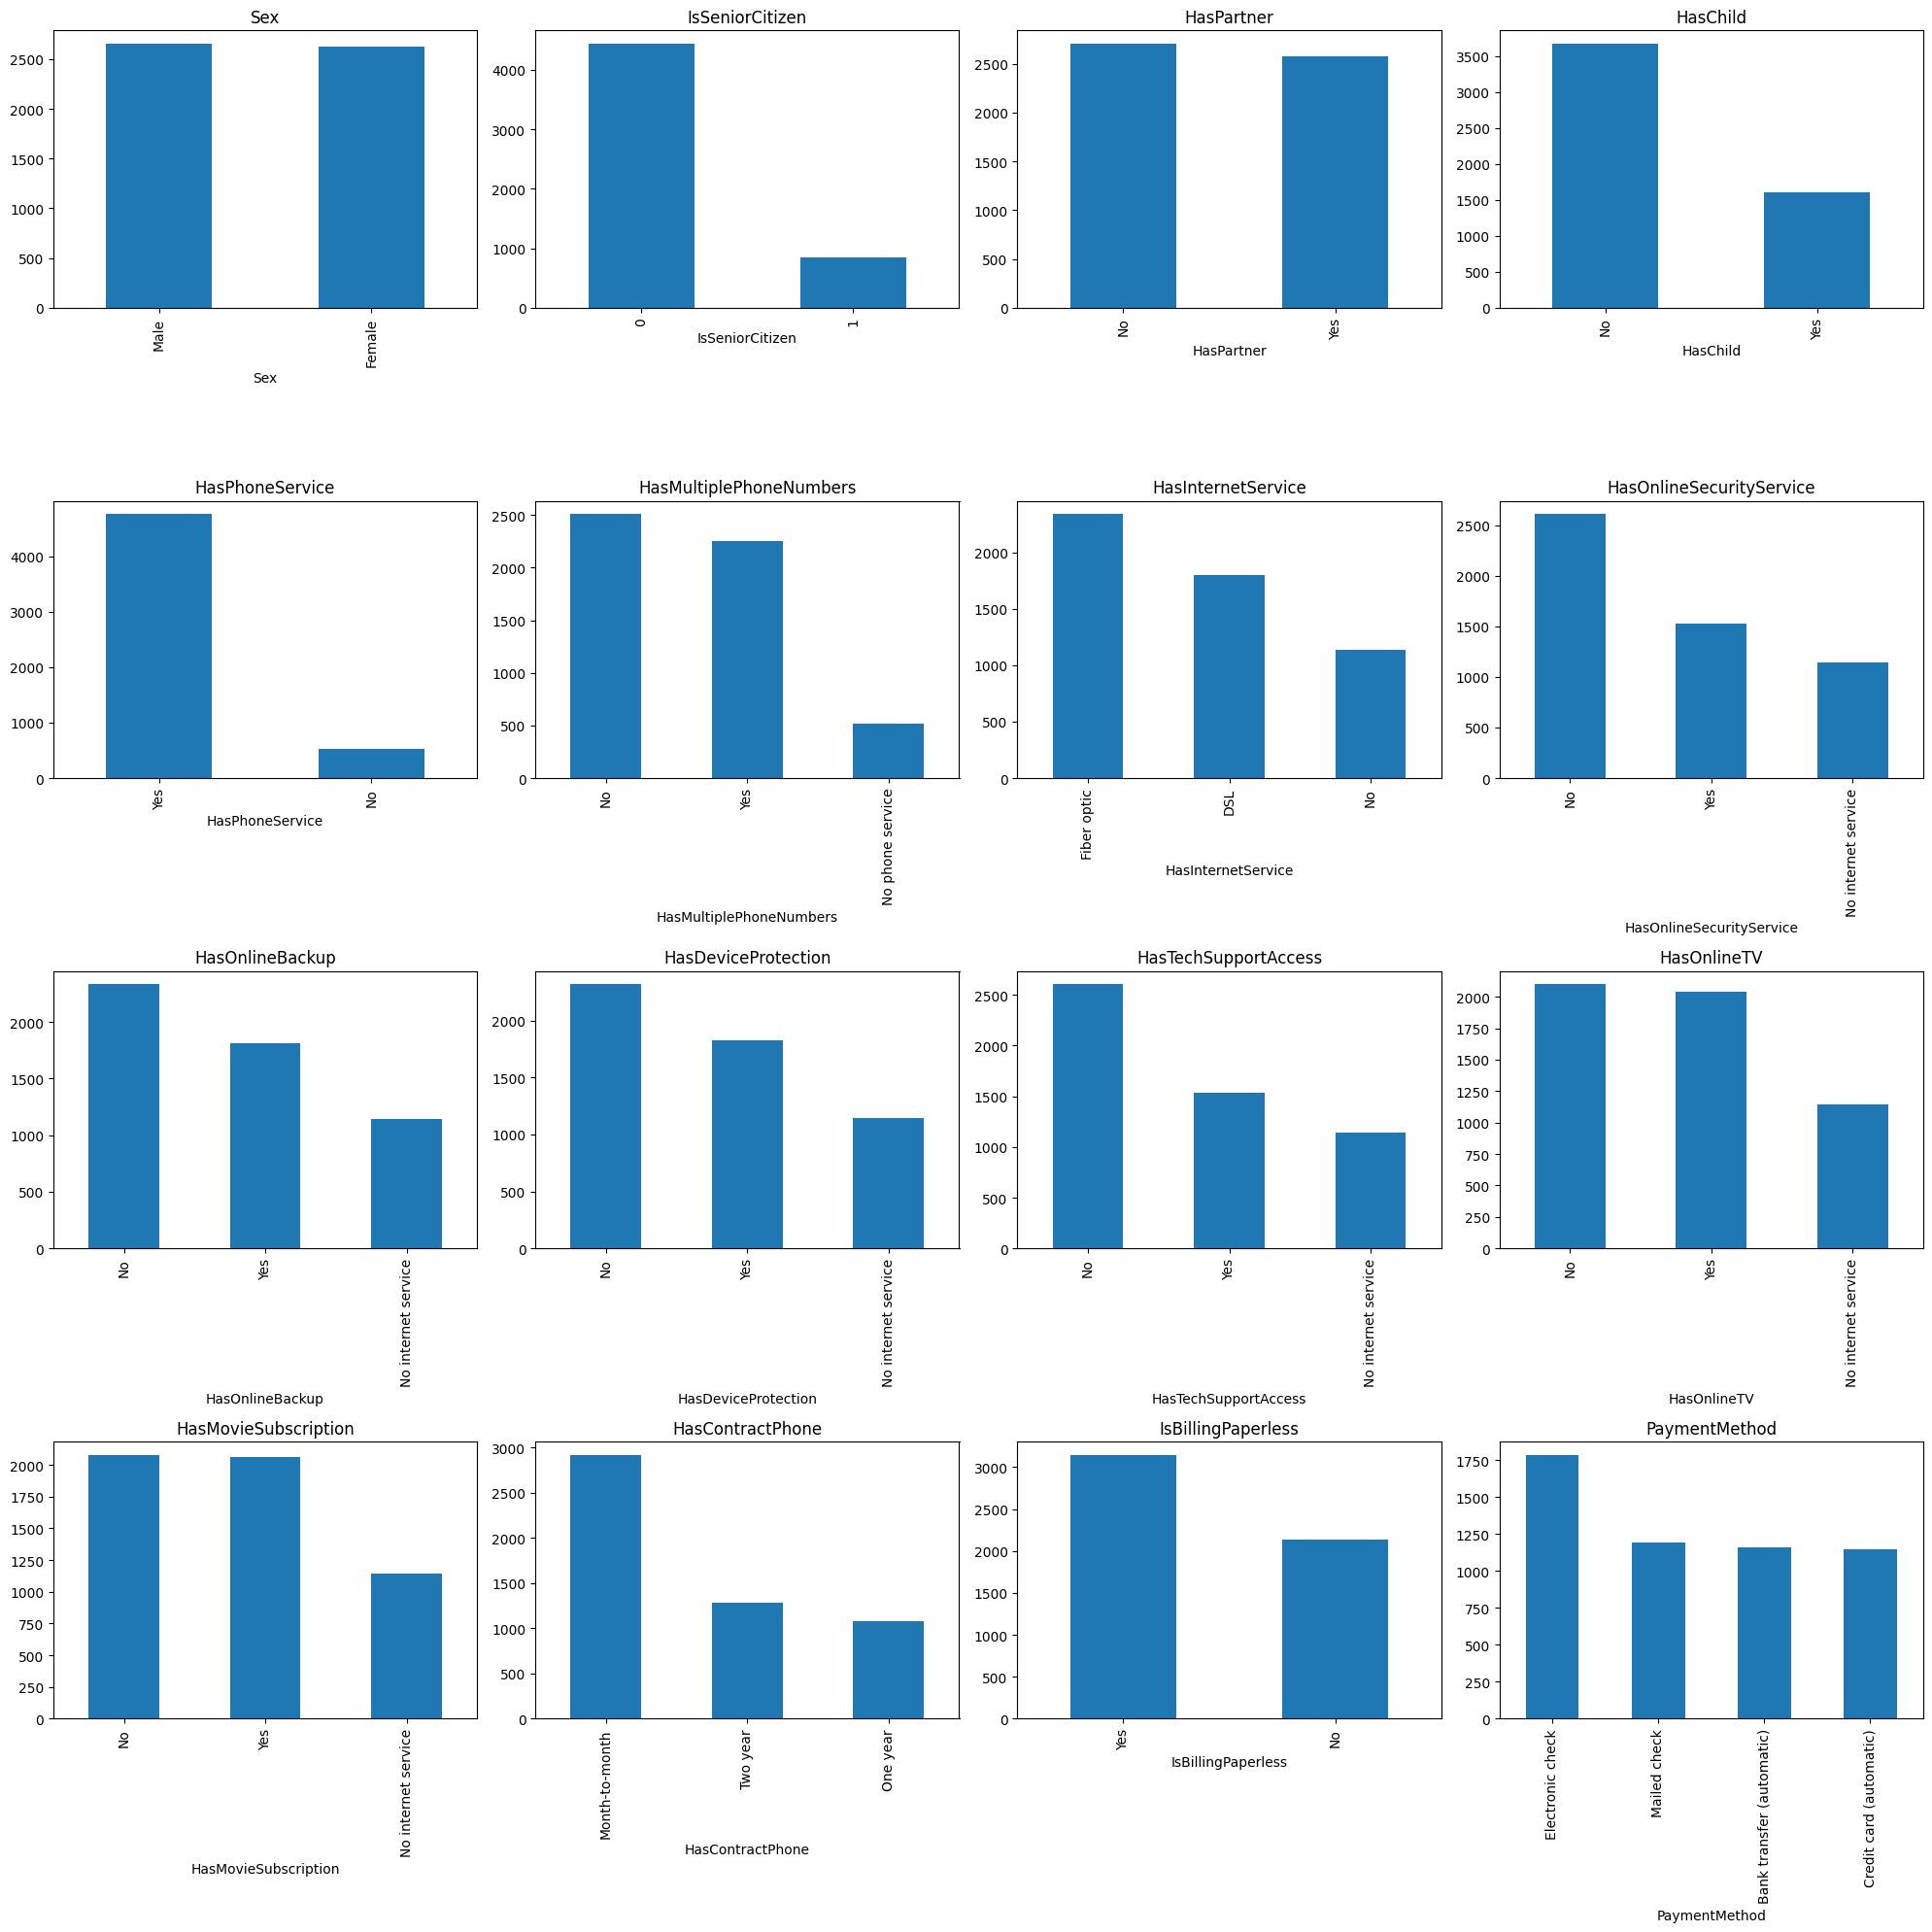

In [ ]:
fig, axes = plt.subplots(ncols=4, nrows=4, figsize=(20, 20))
axes = axes.flatten()

# –ü—Ä–æ—Ö–æ–¥–∏–º –ø–æ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–º –ø—Ä–∏–∑–Ω–∞–∫–∞–º –∏ —Å–æ–∑–¥–∞–µ–º –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—ã
for i, col in enumerate(cat_cols):
    data_train[col].value_counts().plot(kind='bar', ax=axes[i], title=col)

# –£–±–∏—Ä–∞–µ–º –ª–∏—à–Ω–∏–µ –æ—Å–∏, –µ—Å–ª–∏ –∏—Ö –º–µ–Ω—å—à–µ, —á–µ–º 16
for i in range(len(cat_cols), 16):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

‚ùó–≤ —ç—Ç–æ–º —Ä–∞–∑–¥–µ–ª–µ –º—ã –∑–∞–º–µ–Ω—è–µ–º –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –Ω–∞ —á–∏—Å–ª–æ–≤—ã–µ –¥–ª—è –±–æ–ª—å—à–µ–π —á–∞—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ - –≤—Å–µ –æ—á–µ–≤–∏–¥–Ω—ã–µ –ø–æ —Ç–∏–ø—É Yes/No –Ω–∞ 1/0, –Ω–µ–æ—á–µ–≤–∏–¥–Ω—ã–µ –ø–æ–∫–∞ –Ω–µ —Ç—Ä–æ–≥–∞–µ–º.

In [ ]:
data_train.HasInternetService.value_counts()

HasInternetService
Fiber optic    2341
DSL            1800
No             1141
Name: count, dtype: int64

In [ ]:
data_train.HasOnlineSecurityService.value_counts()

HasOnlineSecurityService
No                     2612
Yes                    1529
No internet service    1141
Name: count, dtype: int64

In [ ]:
data_train.IsSeniorCitizen = data_train.IsSeniorCitizen.replace({'Yes': 1, 'No': 0})
data_train.HasPartner = data_train.HasPartner.replace({'Yes': 1, 'No': 0})
data_train.HasChild = data_train.HasChild.replace({'Yes': 1, 'No': 0})
data_train.HasPhoneService = data_train.HasPhoneService.replace({'Yes': 1, 'No': 0})
data_train.HasMultiplePhoneNumbers = data_train.HasMultiplePhoneNumbers.replace({'Yes': 1, 'No': 0})
data_train.HasOnlineSecurityService = data_train.HasOnlineSecurityService.replace({'No internet service':'No'})

data_test.IsSeniorCitizen = data_test.IsSeniorCitizen.replace({'Yes': 1, 'No': 0})
data_test.HasPartner = data_test.HasPartner.replace({'Yes': 1, 'No': 0})
data_test.HasChild = data_test.HasChild.replace({'Yes': 1, 'No': 0})
data_test.HasPhoneService = data_test.HasPhoneService.replace({'Yes': 1, 'No': 0})
data_test.HasMultiplePhoneNumbers = data_test.HasMultiplePhoneNumbers.replace({'Yes': 1, 'No': 0})
data_test.HasOnlineSecurityService = data_test.HasOnlineSecurityService.replace({'No internet service':'No'})

<ipython-input-188-153eff6f4861>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_train.HasPartner = data_train.HasPartner.replace({'Yes': 1, 'No': 0})
<ipython-input-188-153eff6f4861>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_train.HasChild = data_train.HasChild.replace({'Yes': 1, 'No': 0})
<ipython-input-188-153eff6f4861>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt

In [ ]:
data_train.HasOnlineSecurityService = data_train.HasOnlineSecurityService.replace({'Yes': 1, 'No':0})
data_test.HasOnlineSecurityService = data_test.HasOnlineSecurityService.replace({'Yes': 1, 'No':0})

<ipython-input-189-a5ec106288fb>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_train.HasOnlineSecurityService = data_train.HasOnlineSecurityService.replace({'Yes': 1, 'No':0})
<ipython-input-189-a5ec106288fb>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_test.HasOnlineSecurityService = data_test.HasOnlineSecurityService.replace({'Yes': 1, 'No':0})


In [ ]:
data_train.HasOnlineBackup = data_train.HasOnlineBackup.replace({'No internet service':'No'})
data_train.HasOnlineBackup = data_train.HasOnlineBackup.replace({'Yes': 1, 'No':0})

data_test.HasOnlineBackup = data_test.HasOnlineBackup.replace({'No internet service':'No'})
data_test.HasOnlineBackup = data_test.HasOnlineBackup.replace({'Yes': 1, 'No':0})

<ipython-input-190-65431ffa2809>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_train.HasOnlineBackup = data_train.HasOnlineBackup.replace({'Yes': 1, 'No':0})
<ipython-input-190-65431ffa2809>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_test.HasOnlineBackup = data_test.HasOnlineBackup.replace({'Yes': 1, 'No':0})


In [ ]:
data_train.HasOnlineBackup.value_counts()

HasOnlineBackup
0    3473
1    1809
Name: count, dtype: int64

In [ ]:
data_train.HasDeviceProtection.value_counts()

HasDeviceProtection
No                     2317
Yes                    1824
No internet service    1141
Name: count, dtype: int64

In [ ]:
data_train.HasDeviceProtection = data_train.HasDeviceProtection.replace({'No internet service':'No'})
data_train.HasDeviceProtection = data_train.HasDeviceProtection.replace({'Yes': 1, 'No':0})

data_test.HasDeviceProtection = data_test.HasDeviceProtection.replace({'No internet service':'No'})
data_test.HasDeviceProtection = data_test.HasDeviceProtection.replace({'Yes': 1, 'No':0})

<ipython-input-193-ab1957d580d1>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_train.HasDeviceProtection = data_train.HasDeviceProtection.replace({'Yes': 1, 'No':0})
<ipython-input-193-ab1957d580d1>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_test.HasDeviceProtection = data_test.HasDeviceProtection.replace({'Yes': 1, 'No':0})


In [ ]:
data_train.HasTechSupportAccess.value_counts()

HasTechSupportAccess
No                     2604
Yes                    1537
No internet service    1141
Name: count, dtype: int64

In [ ]:
data_train.HasTechSupportAccess = data_train.HasTechSupportAccess.replace({'No internet service':'No'})
data_train.HasTechSupportAccess = data_train.HasTechSupportAccess.replace({'Yes': 1, 'No':0})

data_test.HasTechSupportAccess = data_test.HasTechSupportAccess.replace({'No internet service':'No'})
data_test.HasTechSupportAccess = data_test.HasTechSupportAccess.replace({'Yes': 1, 'No':0})

<ipython-input-195-1bc80cbcf254>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_train.HasTechSupportAccess = data_train.HasTechSupportAccess.replace({'Yes': 1, 'No':0})
<ipython-input-195-1bc80cbcf254>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_test.HasTechSupportAccess = data_test.HasTechSupportAccess.replace({'Yes': 1, 'No':0})


In [ ]:
data_train.HasOnlineTV.value_counts()

HasOnlineTV
No                     2099
Yes                    2042
No internet service    1141
Name: count, dtype: int64

In [ ]:
data_train.HasOnlineTV = data_train.HasOnlineTV.replace({'No internet service':'No'})
data_train.HasOnlineTV = data_train.HasOnlineTV.replace({'Yes': 1, 'No':0})

data_test.HasOnlineTV = data_test.HasOnlineTV.replace({'No internet service':'No'})
data_test.HasOnlineTV = data_test.HasOnlineTV.replace({'Yes': 1, 'No':0})

<ipython-input-197-ff1040a1b321>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_train.HasOnlineTV = data_train.HasOnlineTV.replace({'Yes': 1, 'No':0})
<ipython-input-197-ff1040a1b321>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_test.HasOnlineTV = data_test.HasOnlineTV.replace({'Yes': 1, 'No':0})


In [ ]:
data_train.HasMovieSubscription = data_train.HasMovieSubscription.replace({'No internet service':'No'})
data_train.HasMovieSubscription = data_train.HasMovieSubscription.replace({'Yes': 1, 'No':0})

data_test.HasMovieSubscription = data_test.HasMovieSubscription.replace({'No internet service':'No'})
data_test.HasMovieSubscription = data_test.HasMovieSubscription.replace({'Yes': 1, 'No':0})

<ipython-input-198-3c1e29eba209>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_train.HasMovieSubscription = data_train.HasMovieSubscription.replace({'Yes': 1, 'No':0})
<ipython-input-198-3c1e29eba209>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_test.HasMovieSubscription = data_test.HasMovieSubscription.replace({'Yes': 1, 'No':0})


In [ ]:
data_train.IsBillingPaperless = data_train.IsBillingPaperless.replace({'Yes': 1, 'No':0})
data_test.IsBillingPaperless = data_test.IsBillingPaperless.replace({'Yes': 1, 'No':0})

<ipython-input-199-d71038c124bb>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_train.IsBillingPaperless = data_train.IsBillingPaperless.replace({'Yes': 1, 'No':0})
<ipython-input-199-d71038c124bb>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_test.IsBillingPaperless = data_test.IsBillingPaperless.replace({'Yes': 1, 'No':0})


In [ ]:
data_train.HasContractPhone.value_counts()

HasContractPhone
Month-to-month    2920
Two year          1280
One year          1082
Name: count, dtype: int64

In [ ]:
data_train.PaymentMethod.value_counts()

PaymentMethod
Electronic check             1786
Mailed check                 1194
Bank transfer (automatic)    1159
Credit card (automatic)      1143
Name: count, dtype: int64

In [ ]:
data_train.HasMultiplePhoneNumbers.value_counts()

HasMultiplePhoneNumbers
0                   2511
1                   2250
No phone service     521
Name: count, dtype: int64

In [ ]:
data_train.HasMultiplePhoneNumbers = data_train.HasMultiplePhoneNumbers.replace({'No phone service': 0})
data_test.HasMultiplePhoneNumbers = data_test.HasMultiplePhoneNumbers.replace({'No phone service': 0})

<ipython-input-203-061c4af6649f>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_train.HasMultiplePhoneNumbers = data_train.HasMultiplePhoneNumbers.replace({'No phone service': 0})
<ipython-input-203-061c4af6649f>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_test.HasMultiplePhoneNumbers = data_test.HasMultiplePhoneNumbers.replace({'No phone service': 0})


In [ ]:
data_train.HasContractPhone.value_counts()

HasContractPhone
Month-to-month    2920
Two year          1280
One year          1082
Name: count, dtype: int64

In [ ]:
data_train.value_counts()

ClientPeriod  MonthlySpending  TotalSpent  Sex     IsSeniorCitizen  HasPartner  HasChild  HasPhoneService  HasMultiplePhoneNumbers  HasInternetService  HasOnlineSecurityService  HasOnlineBackup  HasDeviceProtection  HasTechSupportAccess  HasOnlineTV  HasMovieSubscription  HasContractPhone  IsBillingPaperless  PaymentMethod              Churn
72.0          115.05           8017.7875   Female  0                1           1         1                1                        Fiber optic         1                         1                1                    1                     1            1                     Two year          1                   Bank transfer (automatic)  0        5
1.0           20.20            20.2000     Male    0                0           0         1                0                        No                  0                         0                0                    0                     0            0                     Month-to-month    0                   Mailed check               0        2
72.0          115.05           8017.7875   Female  0                1           1         1                1                        Fiber optic         1                         1                1                    1                     1            1                     Two year          1                   Credit card (automatic)    0        2
1.0           45.30            45.3000     Male    0                0           0         1                0                        DSL                 0                         0                0                    0                     0            0                     Month-to-month    0                   Electronic check           1        2
              20.05            20.0500     Male    0                0           0         1                0                        No                  0                         0                0                    0                     0            0                     Month-to-month    0                   Mailed check               0        2
                                                                                                                                                                                                                                                                                                                                                          ..
15.0          19.65            332.6500    Male    0                1           1         1                0                        No                  0                         0                0                    0                     0            0                     One year          0                   Mailed check               0        1
              19.60            299.4000    Female  0                0           0         1                0                        No                  0                         0                0                    0                     0            0                     Month-to-month    0                   Mailed check               0        1
              19.50            239.7500    Male    0                1           1         1                0                        No                  0                         0                0                    0                     0            0                     One year          1                   Mailed check               0        1
              19.45            340.8500    Male    0                1           0         1                0                        No                  0                         0                0                    0                     0            0                     Month-to-month    1                   Credit card (automatic)    0        1
72.0          115.05           8017.7875   Male    1                1           1         1                1                        Fiber optic         1             

‚ùó –Ω–µ–æ—á–µ–≤–∏–¥–Ω—ã–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤—ã–≤–∞–µ–º –≤ —á–∏—Å–ª–æ–≤—ã–µ columns=['Sex', 'HasInternetService', 'HasContractPhone', 'PaymentMethod'] —á–µ—Ä–µ–∑ encoding ‚≠êget_dummies‚≠ê

In [ ]:
data_train_dummies = pd.get_dummies(data_train, columns=['Sex', 'HasInternetService', 'HasContractPhone', 'PaymentMethod'], drop_first=True)
data_test_dummies = pd.get_dummies(data_test, columns=['Sex', 'HasInternetService', 'HasContractPhone', 'PaymentMethod'], drop_first=True)

In [ ]:
data_train_dummies.dtypes

ClientPeriod                             float64
MonthlySpending                          float64
TotalSpent                               float64
IsSeniorCitizen                            int64
HasPartner                                 int64
HasChild                                   int64
HasPhoneService                            int64
HasMultiplePhoneNumbers                    int64
HasOnlineSecurityService                   int64
HasOnlineBackup                            int64
HasDeviceProtection                        int64
HasTechSupportAccess                       int64
HasOnlineTV                                int64
HasMovieSubscription                       int64
IsBillingPaperless                         int64
Churn                                      int64
Sex_Male                                    bool
HasInternetService_Fiber optic              bool
HasInternetService_No                       bool
HasContractPhone_One year                   bool
HasContractPhone_Two year                   bool
PaymentMethod_Credit card (automatic)       bool
PaymentMethod_Electronic check              bool
PaymentMethod_Mailed check                  bool
dtype: object

In [ ]:
bool_columns = data_train_dummies.select_dtypes(include='bool').columns
bool_columns

Index(['Sex_Male', 'HasInternetService_Fiber optic', 'HasInternetService_No',
       'HasContractPhone_One year', 'HasContractPhone_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [ ]:
data_train_dummies[bool_columns] = data_train_dummies[bool_columns].astype(int)
data_test_dummies[bool_columns] = data_test_dummies[bool_columns].astype(int)

TypeError: Cannot interpret '5' as a data type

In [ ]:
data_test_dummies.dtypes

In [ ]:
#data_train.dtypes
data_test_dummies.dtypes

# –¢–µ–ø–µ—Ä—å –≤—Å–µ —Ñ–∏—á–∏ —á–∏—Å–ª–æ–≤—ã–µ

In [ ]:
data_train_dummies.isna().sum()
data_test_dummies.isna().sum()

In [ ]:
target_feature = data_train_dummies.Churn.value_counts()

In [ ]:
bar_chart = target_feature.plot(kind='bar')
#will be SMOTEd later <- y_train, X_train

In [ ]:
# –ü–æ—Å–º–æ—Ç—Ä–∏–º –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é —Ñ–∏—á–µ–π
correlation_matrix = data_train_dummies.corr()
correlation_matrix

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.show()

In [ ]:
target_correlation = data_train_dummies.corr()['Churn'].sort_values(ascending=False)

# –í—ã–≤–µ–¥–µ–º –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏
target_correlation

In [ ]:
features_drop = target_correlation[abs(target_correlation) < 0.05].index
features_drop

In [ ]:
#features_drop = features_drop.drop('Sex_Male')
# –±–æ–ª—å—à–µ –Ω–µ –¥—Ä–æ–ø–∞–µ–º —Å–µ–∫—Å–º–µ–π–ª <-> –Ω–µ –¥–∞–ª–æ –±–æ–ª—å—à–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç
features_drop

In [ ]:
data_train_dummies.TotalSpent.head()

In [ ]:
data_train_dummies.MonthlySpending.head()

In [ ]:
data_train_dummies.ClientPeriod.head()

In [ ]:
25.85*72
# —É –º–µ–Ω—è –µ—Å—Ç—å –ø–æ–¥–æ–∑—Ä–µ–Ω–∏–µ, —á—Ç–æ TotalSpent = ClientPeriod * MonthlySpending (approx)
# –æ—Ç—Å—é–¥–∞ –º—É–ª—å—Ç–∏–∫–æ–ª–ª–∏–Ω–µ–∞—Ä–Ω–æ—Å—Ç—å

In [ ]:
data_test_dummies = data_test_dummies.drop(columns=['TotalSpent'])
data_train_dummies = data_train_dummies.drop(columns=['TotalSpent'])

In [ ]:
data_train_dummies.drop(columns=features_drop, inplace=True)
data_test_dummies.drop(columns=features_drop, inplace=True)

‚ùó Imbalance of target value --> use SMOTE later

In [ ]:
corr_new = data_train_dummies.corr()['Churn'].sort_values(ascending=False)
corr_new

Churn                                    1.000000
HasInternetService_Fiber optic           0.300399
PaymentMethod_Electronic check           0.296715
IsBillingPaperless                       0.194040
MonthlySpending                          0.185022
IsSeniorCitizen                          0.156872
HasOnlineTV                              0.059193
HasMovieSubscription                     0.050521
HasDeviceProtection                     -0.068752
PaymentMethod_Mailed check              -0.085284
HasOnlineBackup                         -0.088003
PaymentMethod_Credit card (automatic)   -0.140615
HasPartner                              -0.148347
HasChild                                -0.163609
HasTechSupportAccess                    -0.165618
HasContractPhone_One year               -0.174425
HasOnlineSecurityService                -0.182871
HasInternetService_No                   -0.226991
HasContractPhone_Two year               -0.303830
ClientPeriod                            -0.350640
Name: Churn, dtype: float64

## –ê–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö (3 –±–∞–ª–ª–∞)

1) –î–ª—è —á–∏—Å–ª–µ–Ω–Ω—ã—Ö –ø—Ä–∏–∑–∞–Ω–∫–æ–≤ –ø–æ—Å—Ç—Ä–æ–π—Ç–µ –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—É (*plt.hist(...)*) –∏–ª–∏ boxplot (*plt.boxplot(...)*). –î–ª—è –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø–æ—Å—á–∏—Ç–∞–π—Ç–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–∞–∂–¥–æ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞. –î–ª—è –∫–∞–∂–¥–æ–π –∫–æ–ª–æ–Ω–∫–∏ –Ω–∞–¥–æ —Å–¥–µ–ª–∞—Ç—å *data.value_counts()* –∏ –ø–æ—Å—Ç—Ä–æ–∏—Ç—å bar –¥–∏–∞–≥—Ä–∞–º–º—ã *plt.bar(...)* –∏–ª–∏ –∫—Ä—É–≥–æ–≤—ã–µ –¥–∏–∞–≥—Ä–∞–º–º—ã *plt.pie(...)* (—Ö–æ—Ä–æ—à–æ, –µ–ª—Å–∏ –≤—ã —Å–º–æ–∂–µ—Ç–µ —ç—Ç–æ —Å–¥–µ–ª–∞—Ç—å –Ω–∞ –æ–¥–Ω–æ–º –≥–∞—Ä—Ñ–∏–∫–µ —Å –ø–æ–º–æ—â—å—é *plt.subplots(...)*).

2) –ü–æ—Å–º–æ—Ç—Ä–∏—Ç–µ –Ω–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –∏ —Å–∫–∞–∂–∏—Ç–µ, —è–≤–ª—è—é—Ç—Å—è –ª–∏ –∫–ª–∞—Å—Å—ã –Ω–µ—Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–Ω—ã–º–∏.

3) (–ï—Å–ª–∏ –±—É–¥–µ—Ç –∂–µ–ª–∞–Ω–∏–µ) –ü–æ–∏–≥—Ä–∞–π—Ç–µ —Å —Ä–∞–∑–Ω—ã–º–∏ –±–∏–±–ª–∏–æ—Ç–µ–∫–∞–º–∏ –¥–ª—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏ - *sns*, *pandas_visual_analysis*, etc.

–í—Ç–æ—Ä–æ–π –ø—É–Ω–∫—Ç –æ—á–µ–Ω—å –≤–∞–∂–µ–Ω, –ø–æ—Ç–æ–º—É —á—Ç–æ —Å—É—â–µ—Å—Ç–≤—É—é—Ç –∑–∞–¥–∞—á–∏ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ —Å –Ω–µ—Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–Ω—ã–º–∏ –∫–ª–∞—Å—Å–∞–º–∏. –ù–∞–ø—Ä–∏–º–µ—Ä, —ç—Ç–æ –º–æ–∂–µ—Ç –∑–Ω–∞—á–∏—Ç—å, —á—Ç–æ –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ –Ω–∞–º–Ω–æ–≥–æ –±–æ–ª—å—à–µ –ø—Ä–∏–º–µ—Ä–æ–≤ 0 –∫–ª–∞—Å—Å–∞. –í —Ç–∞–∫–∏—Ö —Å–ª—É—á–∞—è—Ö –Ω—É–∂–Ω–æ 1) –Ω–µ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å accuracy –∫–∞–∫ –º–µ—Ç—Ä–∏–∫—É 2) –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –º–µ—Ç–æ–¥—ã –±–æ—Ä—å–±—ã —Å imbalanced dataset (–æ–±—ã—á–Ω–æ –µ—Å–ª–∏ –¥–∞—Ç–∞—Å–µ—Ç —Å–∏–ª—å–Ω–æ –Ω–µ—Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω, —Ç.–µ. –∫–ª–∞—Å—Å–∞ 1 –≤ 20 —Ä–∞–∑ –º–µ–Ω—å—à–µ –∫–ª–∞—Å—Å–∞ 0).

(–î–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ) –ï—Å–ª–∏ –≤—ã –Ω–∞—à–ª–∏ –∫–∞–∫–∏–µ-—Ç–æ –æ—à–∏–±–∫–∏ –≤ –¥–∞–Ω–Ω—ã—Ö –∏–ª–∏ –≤—ã–±—Ä–æ—Å—ã, —Ç–æ –º–æ–∂–µ—Ç–µ –∏—Ö —É–±—Ä–∞—Ç—å. –¢—É—Ç –º–æ–∂–Ω–æ –ø–æ—ç–∫—Å–ø–µ—Ä–µ–º–µ–Ω—Ç–∏—Ä–æ–≤–∞—Ç—å —Å –æ–±—Ä–∞–±–æ—Ç–∫–æ–π –¥–∞–Ω–Ω—ã—Ö –∫–∞–∫ —É–≥–æ–¥–Ω–æ, –Ω–æ –Ω–µ –∑–∞ –±–∞–ª–ª—ã.

In [ ]:
# 1. –ì–∏—Å—Ç–æ–≥—Ä–∞–º–º—ã –∏ –ø–ª–æ—Ç—ã –±—ã–ª–∏ –ø–æ—Å—Ç—Ä–æ–µ–Ω—ã –≤—ã—à–µ
# 2. –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π —Ç–∞–∫–∂–µ –ø–æ—Å–º–æ—Ç—Ä–µ–ª–∏ –≤—ã—à–µ - —Ü–µ–ª–µ–≤–∞—è –Ω–µ—Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–Ω–∞, –Ω–∏–∂–µ –ø—Ä–∏–º–µ–Ω—è–µ–º SMOTE –¥–ª—è –±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∫–∏.
# 3. –°–¥–µ–ª–∞–Ω–æ –≤—ã—à–µ

# –í—ã–±—Ä–æ—Å—ã —Ç–∞–∫–∂–µ –ø–æ–¥–∫–æ—Ä—Ä–µ–∫—Ç–∏—Ä–æ–≤–∞–Ω–Ω—ã –≤—ã—à–µ

## –ü—Ä–∏–º–µ–Ω–µ–Ω–∏–µ –ª–∏–Ω–µ–π–Ω—ã—Ö –º–æ–¥–µ–ª–µ–π (3 –±–∞–ª–ª–∞)

1) –û–±—Ä–∞–±–æ—Ç–∞–π—Ç–µ –¥–∞–Ω–Ω—ã–µ –¥–ª—è —Ç–æ–≥–æ, —á—Ç–æ–±—ã –∫ –Ω–∏–º –º–æ–∂–Ω–æ –±—ã–ª–æ –ø—Ä–∏–º–µ–Ω–∏—Ç—å LogisticRegression. –¢.–µ. –æ—Ç–Ω–æ—Ä–º–∏—Ä—É–π—Ç–µ —á–∏—Å–ª–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏, –∞ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –∑–∞–∫–æ–¥–∏—Ä—É–π—Ç–µ —Å –ø–æ–º–æ—â—å—é one-hot-encoding'–∞. ‚è∞ —Å–¥–µ–ª–∞–Ω–æ –≤—ã—à–µ
2) –° –ø–æ–º–æ—â—å—é –∫—Ä–æ—Å—Å–≤–∞–ª–∏–¥–∞—Ü–∏–∏ –∏–ª–∏ —Ä–∞–∑–¥–µ–ª–µ–Ω–∏—è –Ω–∞ train/valid –≤—ã–±–æ—Ä–∫—É –ø—Ä–æ—Ç–µ—Å—Ç–∏—Ä—É–π—Ç–µ —Ä–∞–∑–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–∞ C –∏ –≤—ã–±–µ—Ä–∏—Ç–µ –ª—É—á—à–∏–π (–º–æ–∂–Ω–æ —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞—Ç—å –°=100, 10, 1, 0.1, 0.01, 0.001) –ø–æ –º–µ—Ç—Ä–∏–∫–µ ROC-AUC. ‚è∞ —Å–¥–µ–ª–∞–Ω–æ –Ω–∏–∂–µ

–ï—Å–ª–∏ –≤—ã —Ä–∞–∑–¥–µ–ª—è–µ—Ç–µ –Ω–∞ train/valid, —Ç–æ –∏—Å–ø–æ–ª—å–∑—É–π—Ç–µ LogisticRegressionCV. –û–Ω —Å–∞–º –ø—Ä–∏ –≤—ã–∑–æ–≤–µ .fit() –ø–æ–¥–±–µ—Ä–µ—Ç –ø–∞—Ä–∞–º–µ—Ç—Ä –°. (–Ω–µ –∑–∞–±—É–¥—å—Ç–µ –ø–µ—Ä–µ–¥–∞—Ç—å scroing='roc_auc', —á—Ç–æ–±—ã –ø—Ä–∏ –∫—Ä–æ—Å—Å–≤–∞–ª–∏–¥–∞—Ü–∏–∏ —Å—Ä–∞–≤–Ω–∏–≤–∞–ª–∏—Å—å –∑–Ω–∞—á–µ–Ω–∏—è —ç—Ç–æ–π –º–µ—Ç—Ä–∏–∫–∏, –∏ refit=True, —á—Ç–æ–±—ã –ø—Ä–∏ –ø–æ—Ç–æ–º –º–æ–¥–µ–ª—å –æ–±—É—á–∏–ª–∞—Å—å –Ω–∞ –≤—Å–µ–º –¥–∞—Ç–∞—Å–µ—Ç–µ —Å –ª—É—á—à–∏–º –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–º C).

In [ ]:
smote = SMOTE(random_state=42)

In [ ]:
data_test_dummies.columns
# –≤ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ —É–∂–µ –Ω–µ—Ç —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π - –∑–∏—Å –∏—Å –≥—É–¥

Index(['ClientPeriod', 'MonthlySpending', 'IsSeniorCitizen', 'HasPartner',
       'HasChild', 'HasOnlineSecurityService', 'HasOnlineBackup',
       'HasDeviceProtection', 'HasTechSupportAccess', 'HasOnlineTV',
       'HasMovieSubscription', 'IsBillingPaperless',
       'HasInternetService_Fiber optic', 'HasInternetService_No',
       'HasContractPhone_One year', 'HasContractPhone_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [ ]:
X_train = data_train_dummies.drop('Churn', axis=1)
y_train = data_train_dummies['Churn']
X_test = data_test_dummies

In [ ]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
smote_class_distribution = pd.Series(y_train_smote).value_counts(normalize=True)
smote_class_distribution

Churn
0    0.5
1    0.5
Name: proportion, dtype: float64

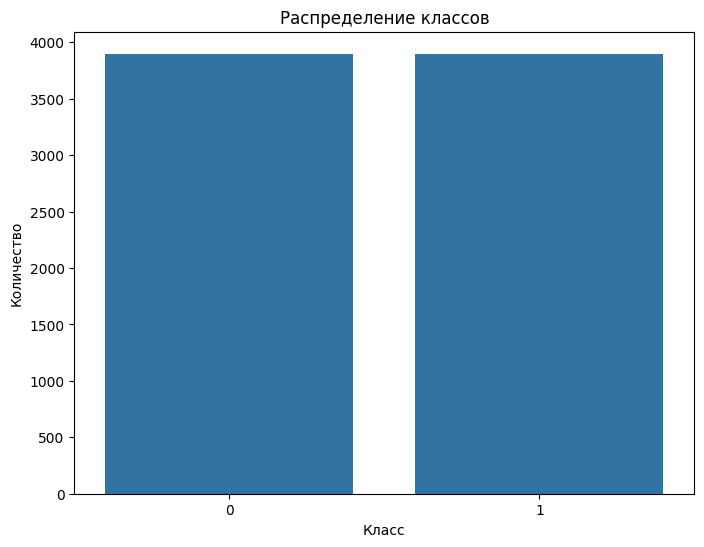

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train_smote)
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–ª–∞—Å—Å–æ–≤')
plt.xlabel('–ö–ª–∞—Å—Å')
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ')
plt.show()

# SMOTE —Å–¥–µ–ª–∞–ª —Å–≤–æ–µ –≥—Ä—è–∑–Ω–æ–µ –¥–µ–ª–æ, —Ç–µ–ø–µ—Ä—å –∫–ª–∞—Å—Å —Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω

In [ ]:
# –¥–æ–±–∞–≤–∏–º Scaler –¥–ª—è –º–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏—è
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

In [ ]:
def train_and_evaluate_model(model, model_name):
    # –ò—Å–ø–æ–ª—å–∑—É–µ–º –º–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ –¥–ª—è –æ–±—É—á–µ–Ω–∏—è –∏ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
    cv_scores = cross_val_score(model, X_train_scaled, y_train_smote, cv=5, scoring='roc_auc')

    print(f"Model: {model_name}")
    print(f"Mean cross-validation roc_auc: {cv_scores.mean():.2f}")
    print("="*60)

    model.fit(X_train_scaled, y_train_smote)

    y_pred_test = model.predict(X_test_scaled)

    print(f"Test predictions for {model_name}:")
    print(y_pred_test)
    print("="*60)

In [ ]:
# –ø—Ä–æ–±—É–µ–º —Ä–∞–∑–Ω—ã–µ –º–æ–¥–µ–ª–∏, –¥–ª—è —Å—Ä–∞–≤–Ω–µ–Ω–∏—è –ø—Ä–æ–¥—É–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏
models = {
    "Random Forest Classifier": RandomForestClassifier(random_state=44),
    "Gaussian Process Classifier": GaussianProcessClassifier(),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "CatBoost Classifier": CatBoostClassifier(verbose=0),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Ridge Classifier": RidgeClassifier(),
    "Logistic Regression (Ridge Regularization)": LogisticRegression(penalty='l2', solver='liblinear')  # Ridge
}

In [ ]:
for model_name, model in models.items():
    train_and_evaluate_model(model, model_name)

Model: Random Forest Classifier
Mean cross-validation f1: 0.92
Test predictions for Random Forest Classifier:
[0 1 0 ... 1 1 0]
Model: Gaussian Process Classifier
Mean cross-validation f1: 0.87
Test predictions for Gaussian Process Classifier:
[0 1 1 ... 1 1 0]
Model: K-Neighbors Classifier
Mean cross-validation f1: 0.87
Test predictions for K-Neighbors Classifier:
[1 1 1 ... 1 1 0]
Model: Decision Tree Classifier
Mean cross-validation f1: 0.79
Test predictions for Decision Tree Classifier:
[0 1 0 ... 1 1 0]
Model: CatBoost Classifier
Mean cross-validation f1: 0.92
Test predictions for CatBoost Classifier:
[0 1 1 ... 1 1 0]
Model: Gradient Boosting Classifier
Mean cross-validation f1: 0.90
Test predictions for Gradient Boosting Classifier:
[0 1 1 ... 1 1 0]
Model: Ridge Classifier
Mean cross-validation f1: 0.88
Test predictions for Ridge Classifier:
[0 1 1 ... 1 1 0]
Model: Logistic Regression (Ridge Regularization)
Mean cross-validation f1: 0.88
Test predictions for Logistic Regressio

‚≠ï –õ–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è - –ø—Ä–æ–≥–æ–Ω—è–µ–º –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã.

Best C: 0.1

Best ROC-AUC from cross-validation: 0.8845

In [ ]:
log_reg = LogisticRegression(penalty='l2', solver='liblinear', random_state=42)

param_grid = {
    'C': [10, 1, 0.1],
    'penalty': ['l2', 'l1'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200],
    'class_weight': [None, 'balanced'],
    'fit_intercept': [True, False]
}

grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_scaled, y_train_smote)

best_model = grid_search.best_estimator_

print(f"Best C: {grid_search.best_params_['C']}")
print(f"Best ROC-AUC from cross-validation: {grid_search.best_score_:.4f}")

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best C: 0.1
Best ROC-AUC from cross-validation: 0.8845


‚ùé –°—ã—Ä–æ–π –ö–ê–¢–ë–£–°–¢ (–ë–æ–∂–µ, –•—Ä–∞–Ω–∏ –ö–∞—Ç–±—É—É—Å—Ç) - —Å –ø–µ—Ä–µ–¥–∞–Ω–Ω—ã–º–∏ –∫–∞—Ç—Ñ–∏—á–∞–º–∏, 0 –æ–±—Ä–∞–±–æ—Ç–∫–∏

Model: CatBoost Classifier
Mean cross-validation f1: 0.73

‚ùé –ù–∞–±–æ—Ä –º–æ–¥–µ–ª–µ–∫ (–û–±—Ä–∞–±–æ—Ç–∫–∞: –≤—Å–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω—ã –≤ –±–∏–Ω–∞—Ä–∫–∏, —ç–Ω–∫–æ—É–¥ —á–µ—Ä–µ–∑ –¥–∞–º–º–∏-–≤–∞–ª—å—é—Å, –ù–ê–ù—ã –∑–∞–º–µ–Ω–µ–Ω—ã –Ω–∞ —Å—Ä–µ–¥–Ω–µ–µ, –ø–ª—é—Å –°–ú–û–£–¢)
 Model: Random Forest Classifier
Mean cross-validation f1: 0.83

Model: Gaussian Process Classifier
Mean cross-validation f1: 0.79

Model: K-Neighbors Classifier
Mean cross-validation f1: 0.77

Model: Decision Tree Classifier
Mean cross-validation f1: 0.78

Model: CatBoost Classifier
Mean cross-validation f1: 0.83

Model: Gradient Boosting Classifier
Mean cross-validation f1: 0.82

–ò–¢–û–ì: –º–µ—Ç—Ä–∏–∫–∞ –Ω–∞ +0.10 for Catboost

‚ùé –ù–∞–±–æ—Ä –º–æ–¥–µ–ª–µ–∫ (–û–±—Ä–∞–±–æ—Ç–∫–∞: –ù–ê–ù—ã –∑–∞–º–µ–Ω–µ–Ω—ã –Ω–∞ –º–æ–¥—É, –Ω–µ–º–Ω–æ–≥–æ –ø–æ—Ç—é–Ω–∏–ª–∞ –≤—ã–±—Ä–æ—Å—ã)
–ù–µ –∏–∑–º–µ–Ω–∏–ª–æ—Å—å –ù–ò-–ß–ï-–ì–û

‚ùé –ù–∞–±–æ—Ä –º–æ–¥–µ–ª–µ–∫ (–í –æ–±—Ä–∞–±–æ—Ç–∫—É –¥–æ–±–∞–≤–∏–ª–∏ - –¥—Ä–æ–ø TotalSpent (–º—É–ª—å—Ç–∏–∫–æ–ª–ª–∏–Ω–µ–∞—Ä–Ω–æ—Å—Ç—å), –ú–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏–µ —á–µ—Ä–µ–∑ scaler, ridge-—Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏—è –¥–ª—è –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ —Å –ø–µ–Ω–∞–ª—å—Ç–∏):
Model: Random Forest Classifier
Mean cross-validation f1: 0.83 (no changes)

Model: Gaussian Process Classifier
Mean cross-validation f1: 0.83 (+0.04)

Model: K-Neighbors Classifier
Mean cross-validation f1: 0.80 (+0.03)

Model: Decision Tree Classifier
Mean cross-validation f1: 0.79 (+0.01)

Model: CatBoost Classifier
Mean cross-validation f1: 0.83 (catboostu pohuyu on itak prekrasen)

Model: Gradient Boosting Classifier
Mean cross-validation f1: 0.82 (no changes)

Model: Ridge Classifier
Mean cross-validation f1: 0.81 (NEW)

Model: Logistic Regression (Ridge Regularization)
Mean cross-validation f1: 0.81 (NEW)

‚ò¢ ROC-AUC –≤–∞—à–µ–≥–æ —Ä–µ—à–µ–Ω–∏—è —Ä–∞–≤–µ–Ω 0.7440737808228032. –≠—Ç–æ –¥–∞–µ—Ç –≤–∞–º 3.0 –±–∞–ª–ª–æ–≤. –ß–µ–∫–Ω–∏ —Ä–æ–∫-–∞—É–∫ –Ω–∞ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏, —á—Ç–æ–±—ã –ø–æ–Ω—è—Ç—å —Å—Ç–µ–ø–µ–Ω—å –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏—è. –ù–æ –ø–æ—Ö–æ–¥—É –æ–Ω–∞ –≤—ã—Å–æ–∫–∞—è —à–æ –ø–ø—Ü

‚úÖ 15.10 -
1. –ø–æ–ø—Ä–æ–±–æ–≤–∞—Ç—å –¥—Ä–æ–ø–Ω—É—Ç—å –∫–æ—Ä—Ä–µ–ª–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ —Å —Ü–µ–ª–µ–≤–æ–π —Ñ–∏—á–µ–π –ø—Ä–∏–∑–Ω–∞–∫–∏ (–≤–æ–∑—å–º–∏ –∞–±—Å–æ–ª—é—Ç –≤–∞–ª—å—é) - —Ñ–∏—á–∏ —Å abs(corr) < 0.1 –¥—Ä–æ–ø–Ω—É–ª–∏ f1, –Ω–æ —Ç–µ—Å—Ç–æ–≤—ã–π roc-auc –ø–æ–¥–Ω—è–ª—Å—è +0.1
2. –ü–æ—Ç—é–Ω–∏—Ç—å learning_rate, –≥–ª—É–±–∏–Ω—É –∏ –¥—Ä –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –¥–ª—è catboost, –æ–Ω –µ—â–µ —Å—ã—Ä–æ–≤–∞—Ç

ROC-AUC –≤–∞—à–µ–≥–æ —Ä–µ—à–µ–Ω–∏—è —Ä–∞–≤–µ–Ω 0.7585027308276507.

–≠—Ç–æ –ø–æ—Å–ª–µ –¥—Ä–æ–ø–∞ abs(corr) < 0.1

Model: Random Forest Classifier
Mean cross-validation f1: 0.92

Model: Gaussian Process Classifier
Mean cross-validation f1: 0.87

Model: K-Neighbors Classifier
Mean cross-validation f1: 0.87

Model: Decision Tree Classifier
Mean cross-validation f1: 0.79

Model: CatBoost Classifier
Mean cross-validation f1: 0.92

Model: Gradient Boosting Classifier
Mean cross-validation f1: 0.90

Model: Ridge Classifier
Mean cross-validation f1: 0.88

Model: Logistic Regression (Ridge Regularization)
Mean cross-validation f1: 0.89

üíî –∏–¥–µ—è 15.10.2024 12:37

—Ç–∫ SexMale –∏–º–µ–µ—Ç abs(–∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é) –º–µ–Ω—å—à–µ 0.1

0.006370	-0.011733	0.006401	0.013207	0.002780	0.014605	-0.007771	-0.003035	-0.012985	-0.007417	...	-0.015698	-0.008325	1.000000	-0.002824	0.005958	0.012321	-0.011835	-0.006924	0.003415	0.012525

–ù–ï –ò–ó–ú–ï–ù–ò–õ–û–°–¨ –ù–ò-–ß–ï-–ì–û!!!!!!
–õ–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è —Å Ridge –ø–æ–¥–Ω—è–ª–∞—Å—å –Ω–∞ +0.01

‚ùå —á—É—Ç—å –ø–æ–∑–∂–µ –ø–µ—Ä–µ—à–ª–∞ –Ω–∞ roc-auc –º–µ—Ç—Ä–∏–∫—É

## –ü—Ä–∏–º–µ–Ω–µ–Ω–∏–µ –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ –±—É—Å—Ç–∏–Ω–≥–∞ (2 –±–∞–ª–ª–∞)

–ï—Å–ª–∏ –≤—ã —Ö–æ—Ç–∏—Ç–µ –ø–æ–ª—É—á–∏—Ç—å –±–∞–ª–ª—ã –∑–∞ —Ç–æ—á–Ω—ã–π –æ—Ç–≤–µ—Ç, —Ç–æ —Å—Ç–æ–∏—Ç –ø–æ–ø—Ä–æ–±–æ–≤–∞—Ç—å –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π –±—É—Å—Ç–∏–Ω–≥. –ß–∞—Å—Ç–æ –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π –±—É—Å—Ç–∏–Ω–≥ —Å –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏ –ø–æ —É–º–æ–ª—á–∞–Ω–∏—é –¥–∞—Å—Ç –≤–∞–º 80% —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞ –∑–∞ 0% —É—Å–∏–ª–∏–π.

–ú—ã –±—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å catboost, –ø–æ—ç—Ç–æ–º—É –Ω–∞–º –Ω–µ –Ω–∞–¥–æ –∫–æ–¥–∏—Ä–æ–≤–∞—Ç—å –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏. Catboost —Å–¥–µ–ª–∞–µ—Ç —ç—Ç–æ —Å–∞–º (–≤ .fit() –Ω–∞–¥–æ –ø–µ—Ä–µ–¥–∞—Ç—å cat_features=cat_cols). –ê —á–∏—Å–ª–µ–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –Ω–æ—Ä–º–∏—Ä–æ–≤–∞—Ç—å –¥–ª—è –º–æ–¥–µ–ª–µ–π, –æ—Å–Ω–æ–≤–∞–Ω–Ω—ã—Ö –Ω–∞ –¥–µ—Ä–µ–≤—å—è—Ö –Ω–µ –Ω—É–∂–Ω–æ.

1) –†–∞–∑–¥–µ–ª–∏—Ç–µ –≤—ã–±–æ—Ä–∫—É –Ω–∞ train/valid. –ü—Ä–æ—Ç–µ—Å—Ç–∏—Ä—É–π—Ç–µ catboost c–æ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω—ã–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏.

2) –ü—Ä–æ—Ç–µ—Å—Ç–∏—Ä—É–π—Ç–µ —Ä–∞–∑–Ω—ã–µ –∑–∞–Ω—á–µ–Ω–∏—è –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –¥–µ—Ä–µ–≤—å–µ–≤ –∏ learning_rate'–∞ –∏ –≤—ã–±–µ—Ä–∏—Ç–µ –ª—É—á—à—É—é –ø–æ –º–µ—Ç—Ä–∏–∫–µ ROC-AUC –∫–æ–º–±–∏–Ω–∞—Ü–∏—é.

(–î–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ) –ï—Å—Ç—å –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ —Å–ª–æ–∂–Ω–æ—Å—Ç–∏ —Å —Ç–µ–º, —á—Ç–æ–±—ã –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å CatBoostClassifier –≤–º–µ—Å—Ç–µ —Å GridSearchCV, –ø–æ—ç—Ç–æ–º—É –º—ã –Ω–µ –ø—Ä–æ—Å–∏–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –∫—Ä–æ—Å—Å–≤–∞–ª–∏–¥–∞—Ü–∏—é. –ù–æ –º–æ–∂–µ—Ç–µ –ø–æ–ø—Ä–æ–±–æ–≤–∞—Ç—å)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

–î–∞–Ω–Ω—ã–π —Ç—é–Ω –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –ö–∞—Ç–±—É—Å–∞ –≤—ã–¥–∞–ª —Ä–µ–∑—É–ª—å—Ç–∞—Ç –Ω–∞ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏: 0.9233,
–Ω–∞ —Ç–µ—Å—Ç–µ —Å—Ç–µ–ø - ROC-AUC –≤–∞—à–µ–≥–æ —Ä–µ—à–µ–Ω–∏—è —Ä–∞–≤–µ–Ω 0.7743625375690786.

‚ùó 00:19 16.10:
Catboost –ª—É—á—à–∏–π —Ä–æ–∫-–∞—É–∫ 0.9269 –Ω–∞ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏ –¥—Ä–æ–ø–∞–µ—Ç—Å—è –¥–æ 0.77 –Ω–∞ —Ç–µ—Å—Ç–µ <-> –º–æ–¥–µ–ª—å —Å–∏–ª—å–Ω–æ **–ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∞**!

–ü–æ–ø—Ä–æ–±—É—é —É–º–µ–Ω—å—à–∏—Ç—å iterations, –æ–≥—Ä–∞–Ω–∏—á–∏—Ç—å –≥–ª—É–±–∏–Ω—É –¥–µ—Ä–µ–≤—å–µ–≤, —É–º–µ–Ω—å—à–∏—Ç—å —Å–∫–æ—Ä–æ—Å—Ç—å –æ–±—É—á–µ–Ω–∏—è, —É–≤–µ–ª–∏—á–∏—Ç—å —à—Ç—Ä–∞—Ñ —Å 0.5 –¥–æ range(10,20,5), —É–º–µ–Ω—å–≥–∏—Ç—å random_strength, —É–≤–µ–ª–∏—á–∏—Ç—å –ø–µ–Ω–∞–ª—å—Ç–∏.

Best Parameters: {'sampling_unit': 'Object', 'sampling_frequency': 'PerTree', 'random_strength': 4, 'penalties_coefficient': 15, 'min_data_in_leaf': 30, 'learning_rate': 0.01, 'l2_leaf_reg': 20, 'iterations': 300, 'grow_policy': 'Depthwise', 'early_stopping_rounds': 50, 'depth': 5, 'border_count': 100, 'bootstrap_type': 'Bayesian', 'bagging_temperature': 2}

***Best ROC-AUC from cross-validation: 0.8771 <-> 0.8 –°–Ω–∏–∂–µ–Ω–∏–µ —Å–∫–æ—Ä–∞ –Ω–∞ –∫—Ä–æ—Å—Å-–≤–∞–ª –Ω–æ –ú–ò–ù–£–° –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏–µ***

Fitting 5 folds for each of 192 candidates, totalling 960 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


0:	learn: 0.6591375	total: 16.1ms	remaining: 4.81s
1:	learn: 0.6277339	total: 32.5ms	remaining: 4.84s
2:	learn: 0.6002437	total: 46ms	remaining: 4.55s
3:	learn: 0.5763639	total: 58.8ms	remaining: 4.35s
4:	learn: 0.5563411	total: 73.6ms	remaining: 4.34s
5:	learn: 0.5379021	total: 89.9ms	remaining: 4.41s
6:	learn: 0.5212555	total: 103ms	remaining: 4.31s
7:	learn: 0.5047835	total: 116ms	remaining: 4.23s
8:	learn: 0.4924414	total: 127ms	remaining: 4.09s
9:	learn: 0.4811409	total: 139ms	remaining: 4.04s
10:	learn: 0.4685366	total: 153ms	remaining: 4.03s
11:	learn: 0.4581946	total: 169ms	remaining: 4.05s
12:	learn: 0.4491525	total: 181ms	remaining: 3.99s
13:	learn: 0.4387871	total: 195ms	remaining: 3.99s
14:	learn: 0.4308510	total: 208ms	remaining: 3.94s
15:	learn: 0.4230412	total: 226ms	remaining: 4.01s
16:	learn: 0.4163294	total: 238ms	remaining: 3.96s
17:	learn: 0.4101863	total: 250ms	remaining: 3.92s
18:	learn: 0.4038480	total: 265ms	remaining: 3.91s
19:	learn: 0.3982814	total: 278ms	rem

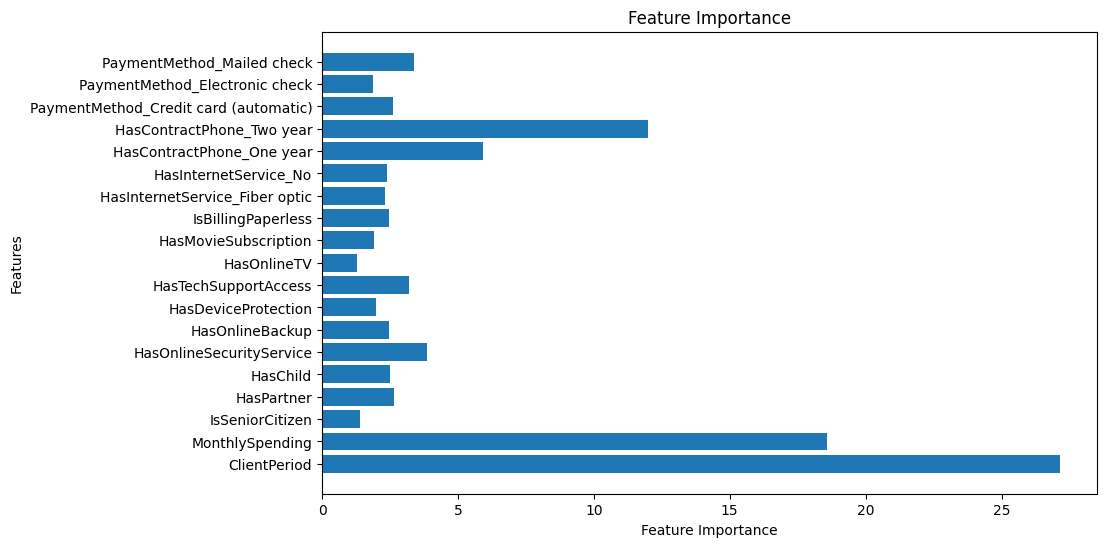

In [ ]:
# –¢–Æ–ù –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –¥–ª—è –∫–∞—Ç–±—É—Å–∞, –∏–∑–Ω–∞—á–∞–ª—å–Ω—ã–π —Ä–æ–∫-–∞—É–∫ 0.92
model_cat = CatBoostClassifier(verbose=1)

param_grid = {
    'iterations': range(100,600,200),
    'depth': range(1,16, 4),
    'learning_rate': [0.05, 0.1],
    'l2_leaf_reg': [0.5, 1, 3, 5],
    'border_count': [50, 100],
    'grow_policy': ['Depthwise']
}

grid_search = GridSearchCV(
    estimator=model_cat,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_scaled, y_train_smote)

best_model_grid = grid_search.best_estimator_
best_params = grid_search.best_params_
feature_imp = best_model_grid.feature_importances_

y_pred_test_cat = best_model_grid.predict(X_test_scaled)


print(f"Best Model: {best_model_grid}")
print(f"Best Parameters: {best_params}")
print(f"Best ROC-AUC from cross-validation: {random_search.best_score_:.4f}")

plt.figure(figsize=(10, 6))
plt.barh(X_train.columns, feature_imp)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è

In [ ]:
submission = pd.read_csv('/content/drive/MyDrive/HW 3 Kaggle/submission.csv')

submission['Churn'] = best_model.predict_proba(X_test)[:, 1]
submission.to_csv('/content/drive/MyDrive/HW 3 Kaggle/my_submission_12Cat.csv', index=False)

NameError: name 'pd' is not defined